# US Accidents Exploratory Data Analysis

- **About this File** (Copied from kaggle)

"This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset."

- **Data Removal** (Updated Dataset)

"Please note that we removed a portion of the data due to a request from one of the main traffic data providers."

*Unfortunately, no information was given concerning <u>which</u> API this was exactly and to what specific areas it caputured data from so this this will introduce some error into the analysis. However, we do know that the previous number of accidents in this record was approximately 4.2 million and that this one has around 1.5 million accidents in the record, which is plenty enough for our analysis.*

In [1]:
# this block is just so that I can later display the plotly outputs in a png format so that they are viewable on github

!pip install plotly>=4.7.1 &> /dev/null
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca &> /dev/null
!chmod +x /usr/local/bin/orca &> /dev/null
!apt-get install xvfb libgtk2.0-0 libgconf-2-4 &> /dev/null

In [2]:
pip install -U kaleido --quiet

     |████████████████████████████████| 79.9 MB 50 kB/s 


In [3]:
pip install opendatasets --quiet

In [4]:
pip install plotly --quiet

In [5]:
import plotly.express as px
import plotly.graph_objects as go


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swagster9000
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 134MB/s]


In [8]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparation and Cleaning

1. Load the file using Pandas

2. Look at some information about the data and the columns

3. Fix any missing or incorrect values

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(data_filename)

In [11]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [51]:
# data type info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  object        
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  datetime64[ns]
 4   Start_Lat              1516064 non-null  float64       
 5   Start_Lng              1516064 non-null  float64       
 6   End_Lat                1516064 non-null  float64       
 7   End_Lng                1516064 non-null  float64       
 8   Distance(mi)           1516064 non-null  float64       
 9   Description            1516064 non-null  object        
 10  Number                 469969 non-null   float64       
 11  Street                 1516064 non-null  object        
 12  Side                   15160

There are a total of 47 columns in this dataframe with various types of data types.

In [13]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


Let's look at how many columns in this dataframe are numeric.

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

14

Now let's look at the percentage of missing values per column.

In [15]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

See how many columns have no missing data vs those that have some.

In [16]:
columns_with_missing = len(missing_percentages[missing_percentages != 0])
columns_without_missing = len(missing_percentages[missing_percentages == 0])

print('There are {} columns with missing data and {} without missing data.'.format(columns_with_missing, columns_without_missing))

There are 19 columns with missing data and 28 without missing data.


This dataset contains accident info from 49 states (missing Alaska).

In [17]:
len(df['State'].unique())

49

In [18]:
'AK' in list(df['State'])

False

In [19]:
df['City'].value_counts()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Alcoa              1
Old Monroe         1
Geraldine          1
Karns City         1
Trilla             1
Name: City, Length: 10657, dtype: int64

Los Angeles and Miami are the two states with the most accidents based off of this data.

In [20]:
df[['Start_Time', 'End_Time', 'Weather_Timestamp']].dtypes

Start_Time           object
End_Time             object
Weather_Timestamp    object
dtype: object

The dates in this dataset are not in a pandas "datetime" format so let's do that here.

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

df[['Start_Time', 'End_Time', 'Weather_Timestamp']].dtypes

Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Weather_Timestamp    datetime64[ns]
dtype: object

***

In [22]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [23]:
accidents_per_state = df['State'].value_counts()
accidents_per_state.head()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

The states with the highest number of accidents ranging from Febraury 2016 to December 2020 are from greatest to least:

1. California

2. Florida

3. Oregon

4. Texas

5. New York

### Let's visualize this information.

In [24]:
import folium
from folium.plugins import HeatMap

sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map(location=[48, -102], zoom_start=4.4)
HeatMap(lat_lon_pairs).add_to(map)
map

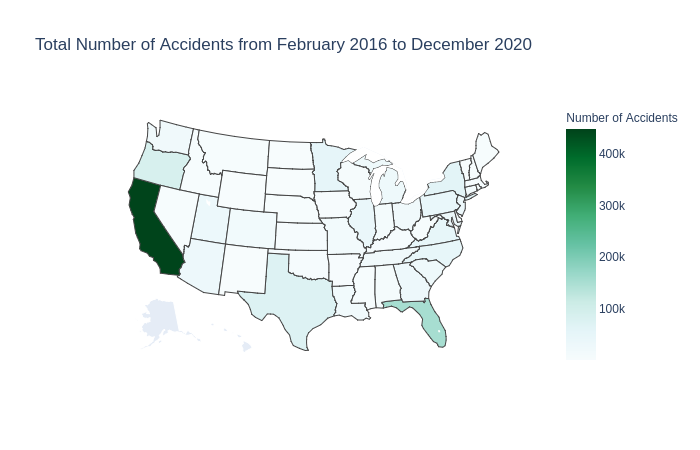

In [25]:
fig = px.choropleth(scope = "usa", color = accidents_per_state.values, locations = accidents_per_state.index,
                    locationmode = 'USA-states', color_continuous_scale = "BuGn",
                    labels = {'color': 'Number of Accidents', 'locations': 'State'}, title = "Total Number of Accidents from February 2016 to December 2020")

fig.show("png")

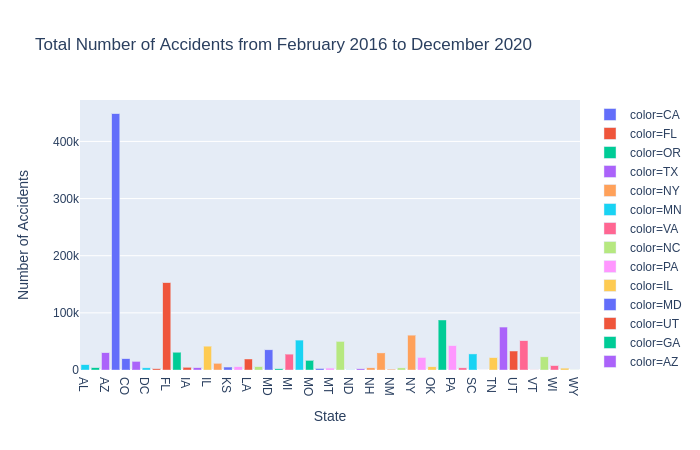

In [26]:
fig = px.bar(x = accidents_per_state.index, y = accidents_per_state.values, labels = {"x": "State", "y": "Number of Accidents"}, 
             title = "Total Number of Accidents from February 2016 to December 2020", color = accidents_per_state.index)
fig.update_layout(xaxis={'categoryorder':'category ascending'})
fig.show("png")

***

### Let's now look at seasonal trends.

Since the data starts at February 2016 (not January 2016), we need to remove the 2016 and just start fresh on January 2017 through December 2020. That way we have the same number of occurrences of months.

In [27]:
df_without_2016 = df[df['Start_Time'].dt.year != 2016]
df_without_2016['Month'] = df['Start_Time'].dt.month

In [28]:
grouped_by_month_without_2016 = df_without_2016[['ID', 'Month']].groupby('Month').count().reset_index()
grouped_by_month_without_2016.rename(columns = {'ID':'Number of Accidents'}, inplace = True)

import calendar
grouped_by_month_without_2016['Month'] = grouped_by_month_without_2016['Month'].apply(lambda x: calendar.month_abbr[x])

grouped_by_month_without_2016

,Month,Number of Accidents
0,Jan,88540
1,Feb,81859
2,Mar,94344
3,Apr,100978
4,May,100820
5,Jun,102953
6,Jul,38652
7,Aug,45019
8,Sep,107807
9,Oct,163631


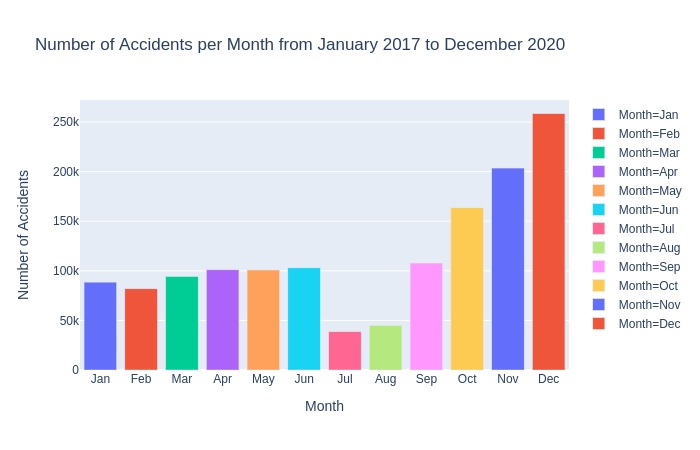

In [29]:
fig = px.bar(grouped_by_month_without_2016, x = 'Month', y = 'Number of Accidents', color = 'Month', title = 'Number of Accidents per Month from January 2017 to December 2020')
fig.show("png")

The number of accidents appears to increase towards the holidays.

### Let's look at accidents per capita for each state.

There is no information concerning the numbers of drivers in this dataset so we will get another dataset and perform a join.

In [30]:
# this gives the population of all the states in the US plus the District of Columbia
# this information is just for 2019

download_url2 = 'https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state'

od.download(download_url2)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swagster9000
Your Kaggle Key: ··········


100%|██████████| 1.43k/1.43k [00:00<00:00, 900kB/s]

In [31]:
data_filename2 = './2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv'

In [32]:
df2 = pd.read_csv(data_filename2)
df2.head()

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


We don't need the latitude and longitude of the capital.

In [33]:
df2.drop(columns = ['lat', 'long'], inplace = True)
df2.head()

,STATE,POPESTIMATE2019
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [34]:
# mapping the US states to their respective abbreviations

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

df2['STATE_CODE'] = df2['STATE'].map(us_state_to_abbrev).fillna(df2['STATE'])
df2.drop(columns = ['STATE'], inplace = True)

df2 = df2[['STATE_CODE', 'POPESTIMATE2019']] # just rearranging the order of the columns

In [35]:
df2.head()

,STATE_CODE,POPESTIMATE2019
0,AL,4903185
1,AK,731545
2,AZ,7278717
3,AR,3017804
4,CA,39512223


In [36]:
merged_df = pd.merge(left = df, right = df2, how = "left", left_on = ['State'], right_on = ['STATE_CODE'])
merged_df.drop(columns = ['STATE_CODE'], inplace = True)

merged_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,POPESTIMATE2019
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,11689100
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,11689100
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,11689100
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,11689100
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,11689100


In [37]:
merged_df_2019 = merged_df[merged_df['Start_Time'].dt.year == 2019]

total_accidents_per_state_2019 = merged_df_2019['State'].value_counts().rename_axis('State').reset_index(name = 'Total Accidents in 2019')

total_accidents_per_state_2019.head()

,State,Total Accidents in 2019
0,CA,108309
1,OR,35121
2,UT,15914
3,MN,11329
4,FL,9972


In [38]:
df2.head()

,STATE_CODE,POPESTIMATE2019
0,AL,4903185
1,AK,731545
2,AZ,7278717
3,AR,3017804
4,CA,39512223


In [39]:
total_accidents_per_state_2019_merged_POPESTIMATE2019 = pd.merge(left = total_accidents_per_state_2019, right = df2, how = "left", left_on = ['State'], right_on = ['STATE_CODE'])
total_accidents_per_state_2019_merged_POPESTIMATE2019.drop(columns = ['STATE_CODE'], inplace = True)
total_accidents_per_state_2019_merged_POPESTIMATE2019.head()

,State,Total Accidents in 2019,POPESTIMATE2019
0,CA,108309,39512223
1,OR,35121,4217737
2,UT,15914,3205958
3,MN,11329,5639632
4,FL,9972,21477737


In [40]:
total_accidents_per_state_2019_merged_POPESTIMATE2019['Accidents per Capita'] = total_accidents_per_state_2019_merged_POPESTIMATE2019['Total Accidents in 2019'] / total_accidents_per_state_2019_merged_POPESTIMATE2019['POPESTIMATE2019']
total_accidents_per_state_2019_merged_POPESTIMATE2019.sort_values(by = ['Accidents per Capita'], ascending = False)

,State,Total Accidents in 2019,POPESTIMATE2019,Accidents per Capita
1,OR,35121,4217737,0.008327
2,UT,15914,3205958,0.004964
0,CA,108309,39512223,0.002741
3,MN,11329,5639632,0.002009
8,CO,6088,5758736,0.001057
26,NH,996,1359711,0.000733
29,RI,764,1059361,0.000721
14,MD,3654,6045680,0.000604
11,WA,4455,7614893,0.000585
39,DC,367,705749,0.000520


It appears that the 5 states with the highest number of accidents per capita are from greatest to least:

1. Oregon

2. Utah

3. California

4. Minnesota

5. Colorado

### Let's visualize these results.

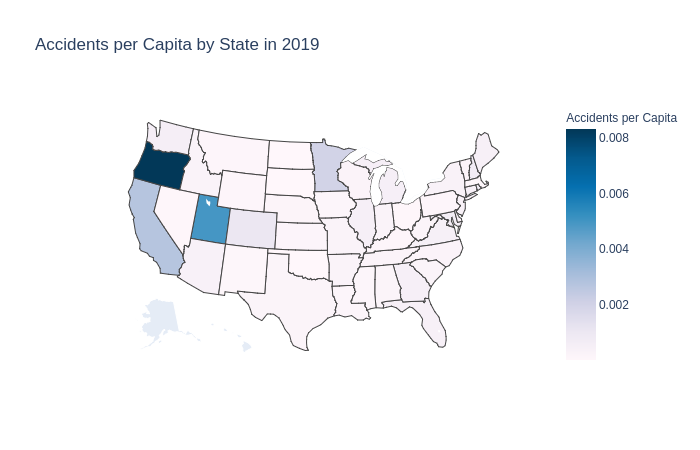

In [42]:
# now plot
fig = px.choropleth(scope = "usa", color = total_accidents_per_state_2019_merged_POPESTIMATE2019['Accidents per Capita'], locations = total_accidents_per_state_2019_merged_POPESTIMATE2019['State'],
                    locationmode = 'USA-states', color_continuous_scale = "PuBu",
                    labels = {'color': 'Accidents per Capita', 'locations': 'State'}, title = "Accidents per Capita by State in 2019")
fig.show("png")

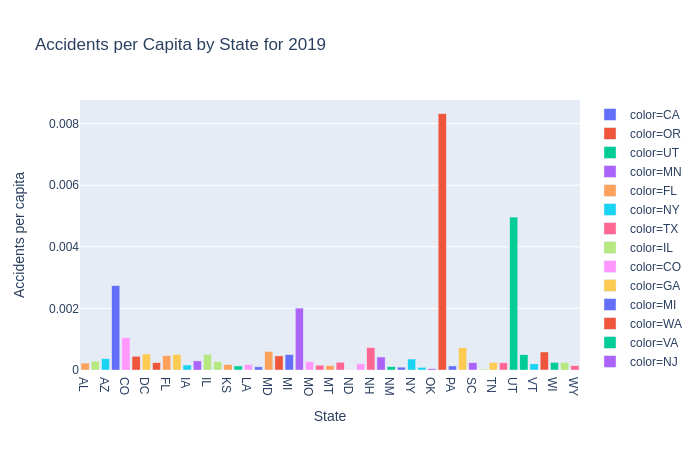

In [43]:
fig = px.bar(x = total_accidents_per_state_2019_merged_POPESTIMATE2019['State'], y = total_accidents_per_state_2019_merged_POPESTIMATE2019['Accidents per Capita'], labels = {"x": "State", "y": "Accidents per capita"}, 
             title = "Accidents per Capita by State for 2019", color = total_accidents_per_state_2019_merged_POPESTIMATE2019['State'])
fig.update_layout(xaxis={'categoryorder':'category ascending'})

fig.show("png")

***

### Let's look at how the total number of accidents have changed over the year.

Let's start with the dataframe not containing 2016 (since it starts at February 2016 and not January).

In [44]:
df_without_2016.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month
15249,A-2731849,2,2017-01-01 00:44:41,2017-01-01 06:57:41,41.65280,-93.69785,41.649353,-93.697770,0.238,Between I-35/I-80 and US-6/Douglas Ave - Accid...,NaN,Merle Hay Rd,R,Johnston,Polk,IA,50131,US,US/Central,KIKV,2017-01-01 00:35:00,23.0,14.7,80.0,29.97,10.0,SW,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,1
15250,A-2731850,2,2017-01-01 01:07:05,2017-01-01 07:07:05,30.02012,-95.82565,30.019387,-95.823781,0.123,Between Beginning of US-290 Freeway and Katy H...,NaN,US-290 W,R,Hockley,Harris,TX,77447,US,US/Central,KTME,2017-01-01 01:15:00,64.4,NaN,100.0,29.86,1.2,Calm,NaN,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1
15251,A-2731851,2,2017-01-01 01:07:05,2017-01-01 07:07:05,30.02509,-95.83735,30.020120,-95.825650,0.780,At Badtke Rd - Accident.,NaN,US-290 E,R,Hockley,Harris,TX,77447,US,US/Central,KTME,2017-01-01 01:15:00,64.4,NaN,100.0,29.86,1.2,Calm,NaN,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1
15252,A-2731852,3,2017-01-01 01:58:51,2017-01-01 07:58:51,32.78833,-97.05835,32.809220,-97.054290,1.462,Between Post and Paddock Rd and Riverside Pky ...,NaN,TX-360 N,R,Grand Prairie,Tarrant,TX,75050,US,US/Central,KGPM,2017-01-01 01:55:00,48.9,NaN,54.0,29.86,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1
15253,A-2731853,3,2017-01-01 02:00:10,2017-01-01 08:00:10,32.76268,-96.77526,32.724300,-96.762260,2.757,Between Lamar St/Exit 283 and Overton Rd/Exit ...,NaN,I-45 S,R,Dallas,Dallas,TX,75215,US,US/Central,KDAL,2017-01-01 01:53:00,48.9,NaN,64.0,29.84,10.0,WNW,5.8,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1


In [45]:
# create a year column

df_without_2016['Year'] = df['Start_Time'].dt.year

In [46]:
df_without_2016['Year'].value_counts()

total_accidents_per_year_without_2016 = df_without_2016['Year'].value_counts().rename_axis('Year').reset_index(name = 'Number of Accidents')
total_accidents_per_year_without_2016.sort_values(by = ['Year'], ascending = False, inplace = True)

total_accidents_per_year_without_2016

,Year,Number of Accidents
0,2020,787932
1,2019,261772
3,2018,166936
2,2017,170099


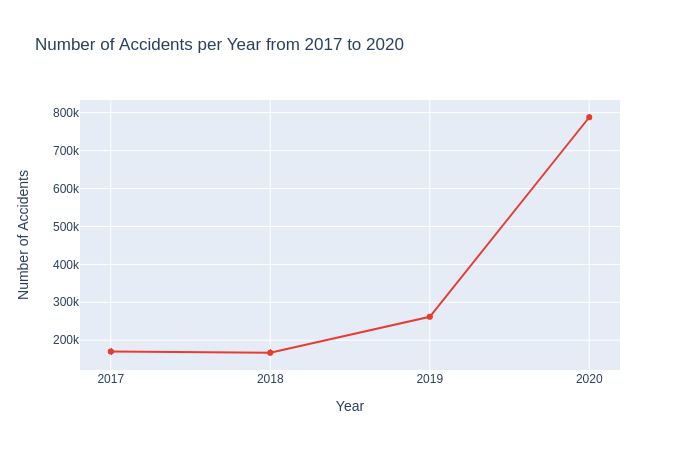

In [63]:
fig = px.line(total_accidents_per_year_without_2016, x = "Year", y = "Number of Accidents",
              title = "Number of Accidents per Year from 2017 to 2020", 
              color_discrete_sequence = ['#e83c33'])

fig.update_traces(textposition = "top left", mode = "lines+markers")
fig.update_xaxes(tickvals=[2017, 2018, 2019, 2020])

fig.show("png")

A sharp increase in the number of accidents occurs in 2020.

***

Create a distribution plot of the start times of the accidents for each hour of the day.

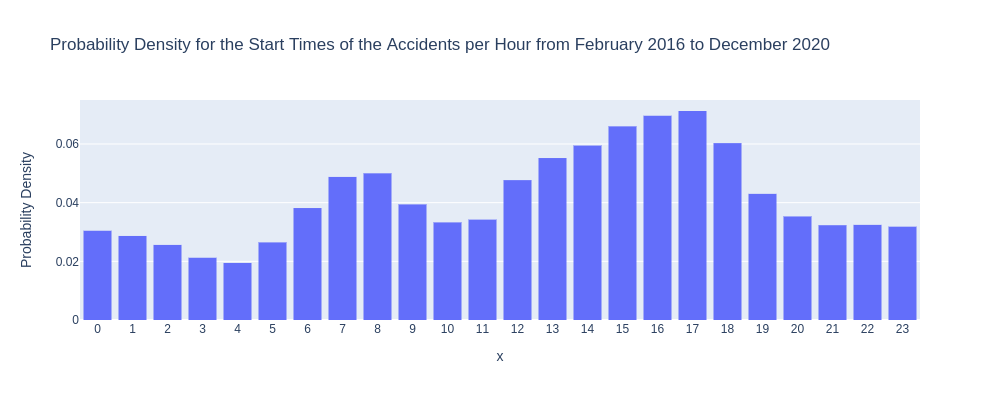

In [59]:
fig = px.histogram(x = df['Start_Time'].dt.hour, nbins = 24, histnorm = 'probability density', title = 'Probability Density for the Start Times of the Accidents per Hour from February 2016 to December 2020',
                   labels = {'value': 'Hour'})
fig.update_layout(bargap=0.2, showlegend = False)
fig.update_xaxes(tickvals = list(range(24)))
fig.update_yaxes(title_text = 'Probability Density')

fig.show("png", width = 1000, height = 400)

Create a distribution plot of the start times of the accidents for each day of the week.

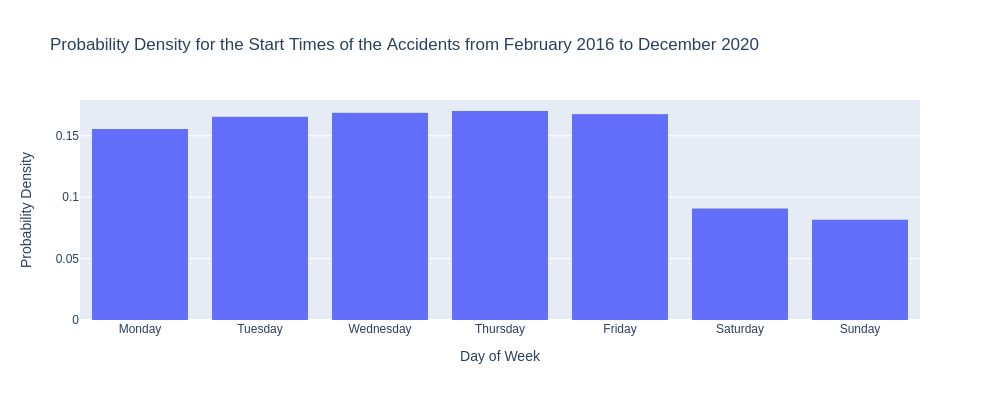

In [64]:
fig = px.histogram(x = df['Start_Time'].dt.day_name(), nbins = 7,
                   histnorm = 'probability density', title = 'Probability Density for the Start Times of the Accidents from February 2016 to December 2020')
fig.update_layout(bargap=0.2, showlegend = False)
fig.update_yaxes(title_text = 'Probability Density')
fig.update_xaxes(title_text = 'Day of Week')

fig.show("png", width = 1000, height = 400)